In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None

# this data set represents the system during deployment

#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopenLabel.xlsx", index_col=0)
df = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Arduino_trainingset_deploymentNormalopenLabel.xlsx", index_col=0)

In [3]:
# check the datatypes in the dataframe to verify that all columns are numerical

df.dtypes

S1             int64
VoltageA0    float64
VoltageA1    float64
VoltageA2    float64
F1             int64
F2             int64
F3             int64
F4             int64
F5             int64
F6             int64
dtype: object

In [4]:
# get a preview on the data

#df.head(3)
df.describe()


,S1,VoltageA0,VoltageA1,VoltageA2,F1,F2,F3,F4,F5,F6
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.0,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,0.340218,1.064938,0.523923,0.120597,0.0,0.027539,0.065404,0.029260,0.065404,0.083764
std,0.473918,1.774011,1.081554,0.695237,0.0,0.163694,0.247309,0.168583,0.247309,0.277113
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.378906,0.317383,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.995117,4.619141,4.628906,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# make a dictionary that maps the dummies to T(rue) F(alse) strings

failure_dict = {}

failure_dict["F1"] = {0: "F, ", 1:"T, "}
failure_dict["F2"] = {0: " F, ", 1:" T, "}
failure_dict["F3"] = {0: " F, ", 1:" T, "}
failure_dict["F4"] = {0: " F, ", 1:" T, "}
failure_dict["F5"] = {0: " F, ", 1:" T, "}
failure_dict["F6"] = {0: " F, ", 1:" T, "}

In [6]:
#In the following blocks the random forest model will be inferred using sklearn
#This RF model should predict a fault from voltage readings and the switch position...

#the steps are:
# define the response variables and convert them into an np.array
# define the explanatory variables
# impute data in case of NaN's by using K nearest neighbours
# define and fit the model
# plot the importance of the various explanatory variables using Gini importance

#I deliberately chose not to partition into a training set and a test set as I just validate the models using fresh input from the process

from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.inspection import permutation_importance

In [7]:
# define the response variables and convert them into an np.array
# note that each fault F1,...,F6 is a classifier that should be predicted
    
y_F1 = np.array(df["F1"])
y_F2 = np.array(df["F2"])
y_F3 = np.array(df["F3"])
y_F4 = np.array(df["F4"])
y_F5 = np.array(df["F5"])
y_F6 = np.array(df["F6"])

In [9]:
# define the explanatory variables
# note that the voltages and the switch position are the explanatory variables for the faults F1,...,F6

X=df.iloc[:,[1,2,3,0]]                 #the order of the columns has just been changed for graphical convenience
X_names=df.iloc[:,[1,2,3,0]].columns   #load a string of column names to label the output of the random forest model afterwards...

#X_names

In [10]:
# impute data in case of NaN's by using K nearest neighbours
# the imputer also transforms X from a pd.DataFrame to a np.array as required for sklearn

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)

In [11]:
# define and fit the model
# for each fault F1,...F6, a dedicated model has been defined
# not much thought has been spent on the choice of the model parameters

#define the model parameters of each fault F1,...,F6
rf_F1 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F2 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F3 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F4 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F5 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F6 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

#fit the models...
rf_F1.fit(X, y_F1)
rf_F2.fit(X, y_F2)
rf_F3.fit(X, y_F3)
rf_F4.fit(X, y_F4)
rf_F5.fit(X, y_F5)
rf_F6.fit(X, y_F6)

RandomForestClassifier(n_estimators=40)

In [12]:
# plot the importance of the various explanatory variables using Gini importance
# Gini importance is a number between zero and one, the heigher the Gini importance the better the explanatory variable can predict the failure y 

#remarks: 
# Do the most important predictors for F2, F4 and F6 from the RF-model correspond with engineering expertise?
# F1 is not in the data set
# try to understand why the RF models deem S1 as most predictive for F3, F5...
# from the above observations you may understand the impact of an incomplete data set.

featureImportances = np.array([rf_F1.feature_importances_, 
                               rf_F2.feature_importances_, 
                               rf_F3.feature_importances_, 
                               rf_F4.feature_importances_, 
                               rf_F5.feature_importances_, 
                               rf_F6.feature_importances_])

pd.DataFrame(featureImportances, columns = X_names, index = ["F1","F2","F3","F4","F5","F6"])

,VoltageA0,VoltageA1,VoltageA2,S1
F1,0.000000,0.000000,0.000000,0.000000
F2,0.468259,0.481538,0.030224,0.019979
F3,0.358717,0.073999,0.002618,0.564666
F4,0.089338,0.735305,0.165453,0.009904
F5,0.383600,0.089807,0.002170,0.524423
F6,0.036949,0.144446,0.809931,0.008673


In [13]:
#In the following blocks the k-means cluster model will be inferred using sklearn
#This k-means cluster model should detect voltage readings and switch positions that are very far away from the training set

#the steps are:
# define the explanatory variables
# impute data in case of NaN's by using K nearest neighbours
# rescale the data
# define the model and fit it to the data
# present the cluster means

#I deliberately chose not to partition into a training set and a test set as I just validate the models using fresh input from the process

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [19]:
# define the cluster variables
# this step should be identical to the corresponding one in the RF-model

X=df.iloc[:,[1,2,3,0]]                 #the order of the columns has just been changed for graphical convenience
X_names=df.iloc[:,[1,2,3,0]].columns   #load a string of column names to label the output of the random forest model afterwards...

#X_names

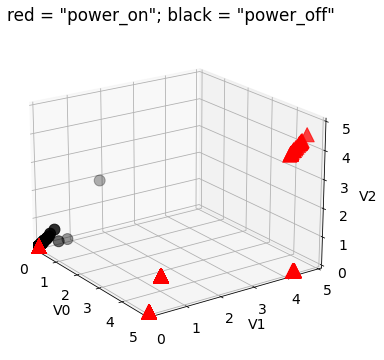

In [42]:
# Define some plt properties
fig = plt.figure(figsize = (6,6))
plt.rcParams['font.size']=14

# Dump the plot
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter3D(X.loc[X.loc[:,'S1']==0,'VoltageA0'], 
             X.loc[X.loc[:,'S1']==0,'VoltageA1'], 
             X.loc[X.loc[:,'S1']==0,'VoltageA2'],
             zdir='z', color='black', marker='o', s=120)
ax.scatter3D(X.loc[X.loc[:,'S1']==1,'VoltageA0'], 
             X.loc[X.loc[:,'S1']==1,'VoltageA1'], 
             X.loc[X.loc[:,'S1']==1,'VoltageA2'], 
             zdir='z', color='red', marker='^', s=200)
ax.set_xlabel('V0'), ax.set_ylabel('V1'),ax.set_zlabel('V2')
ax.set_xlim(0,5),    ax.set_ylim(0,5),   ax.set_zlim(0,5)
ax.set_title('red = "power_on"; black = "power_off"')
ax.view_init(elev=20., azim=-35)#, roll=0)


In [17]:
# impute data in case of NaN's by using K nearest neighbours
# the imputer also transforms X from a pd.DataFrame to a np.array as required for sklearn
# this step should be identical to the corresponding one in the RF-model

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)

In [16]:
# rescale the data
#the choice of the standard scaler is arbitrary and eventually omissible
#the standard scaler transforms the data to z = (data - mean)/ standard devation
#running on unscaled data will make the voltages much more important than the switch as the voltages range over [0,5] and the switch over (0,1)

#set eventually some parameters of the standardscaler
scaler=StandardScaler()

#transform the data X to Z. Here, X will just be overwritten
X = scaler.fit_transform(X)

#print(scaler.mean_)

In [17]:
# prepare an elbow plot to visually determine a feasible number of clusters
#this step is essentially superfluous as deep knowledge about the number of clusters exists. It is just to show the spread reduction as k increases
#the elbow plot shows that variance within the clusters has indeed become ignorable at k>6

inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


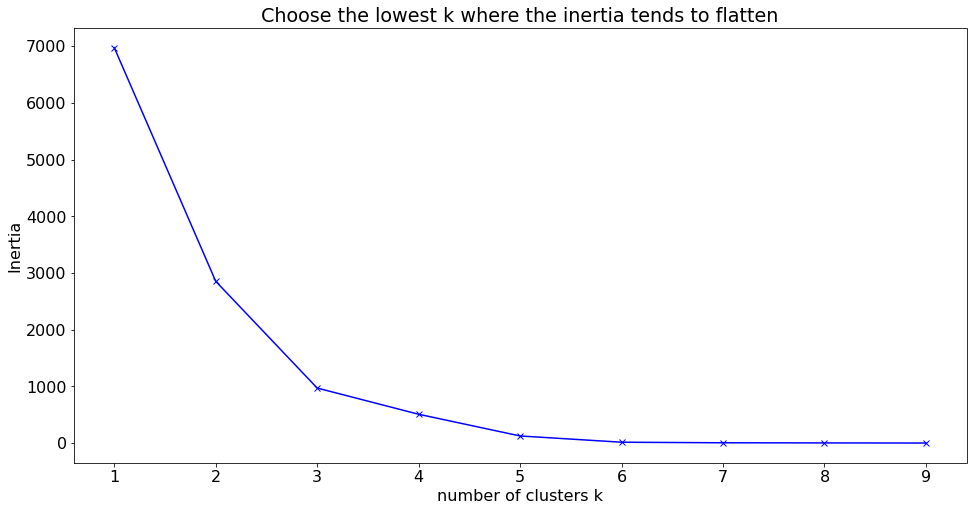

In [18]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()

In [19]:
# define the model and fit it to the data

#define the model
k=6            #specify the number of clusters k. Here it is known that 6 system states have been in the data set
kmeanModel = KMeans(n_clusters=k)

#fit the model
kmeanModel.fit(X)
#kmeanModel.predict(X)

KMeans(n_clusters=6)

In [20]:
# present the cluster means
#remarks
# can you recognise the fact that F1 is not in the data set?
# can you recognise that F3 and F5 only occurred simultaneously in the data set?
# what would be your conclusion if the faults F1,...,F6 would scatter over many rows?
# do the cluster means that allude to faults correspond with engineering judgement?

#just add a label to the original data
df["clusterlabels"]=kmeanModel.labels_

#group the original data by the assigned clusterlabel and calculate the mean
dfclustermeans=df.groupby("clusterlabels").mean()
dfclustermeans

,S1,VoltageA0,VoltageA1,VoltageA2,F1,F2,F3,F4,F5,F6
clusterlabels,,,,,,,,,,
0,0.0,0.000000,0.007227,0.005898,0.0,0.0,0.0,0.0,0.0,0.085217
1,1.0,3.379230,1.449886,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.0,4.995117,4.253235,4.237874,0.0,0.0,0.0,0.0,0.0,1.000000
3,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.000000
4,1.0,4.995117,4.301375,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
5,1.0,4.995117,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000


In [21]:
# load the model inferred from engineering expertise (and not inferred from a data set!)
# the engineering expertise has been captured in a table that defines the possible system states, given some voltages and a switch position
# as this model does not require a history, the blocks below merely "massage" the data to a convenient format during deployment.


In [22]:
#load the representation of the engineering expertise in a pandas dataframe

df_dl = None

# this data set represents the system during deployment
#df_dl =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_deploymentNormalopenLabelDesign.xlsx", index_col=0)
df_dl = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Arduino_trainingset_deploymentNormalopenLabelDesign.xlsx", index_col=0)

In [23]:
# check the datatypes in the dataframe to verify that all voltages are floats]

df_dl = df_dl.astype('float64', errors="ignore") #it appears that that VoltageA2 came in as an integer and that sucks...
df_dl.dtypes

systemState     object
VoltageA0      float64
VoltageA1      float64
VoltageA2      float64
F1              object
F2              object
F3              object
F4              object
F5              object
F6              object
dtype: object

In [24]:
# convert the switch column to an indicator function (0 = switch open; 1 = switch closed

df_dl = pd.get_dummies(df_dl, 
                       columns=["systemState"],     #columns of the switch values
                       prefix="systemState",        #add a prefix
                       prefix_sep="_",              #add a separator between prefix and column name
                       drop_first=True,             #remove the old columns of the switch values
                       dtype=None)
df_dl = df_dl.iloc[:,[3,4,5,6,7,8,0,1,2,9]]         #just reshuffle the order of the columns for convenience
df_dl

,F1,F2,F3,F4,F5,F6,VoltageA0,VoltageA1,VoltageA2,systemState_power_on
0,?,?,?,?,?,?,0.0,0.0,0.0,0
1,F,F,F,F,F,F,3.4,1.4,0.0,1
2,F,T,F,?,?,?,5.0,0.0,0.0,1


In [25]:
# create a dataframe that only has the numerical columns
# remarks:
#only three system states have been put in this dataframe of designer labels
#the labeling includes three states (T,F,?). Now, all the system states at an open switch have all been specified by one line

X_dl = df_dl.select_dtypes(include='number')
X_dl

,VoltageA0,VoltageA1,VoltageA2,systemState_power_on
0,0.0,0.0,0.0,0
1,3.4,1.4,0.0,1
2,5.0,0.0,0.0,1


In [26]:
#The blocks above prepared an rf-model, a k-means clustering model and an expert model that will now be deployed. This means that the
#Arduino controller will capture new data from the process under investigation and that this new data will be evaluated by these models.
#As the observers tend to have a strong opinion about the true system state while observing the process, they could evaluated whether the
#three models corresponds with their beliefs.

#The steps of the deployment are:
# connect with Arduino
# read write the serial connection at a given sampling rate
# start to control the Arduino while collecting the data
# close the serial connection

In [27]:
import serial
import time
import keyboard

In [28]:
# connect with Arduino

ser = serial.Serial('COM3', 9600, timeout=1) #check whether the Arduino is really connected with COM3 or adjust the code to the correct COM
                                             #check at settings and check whether Arduino is a connected device
time.sleep(2)

In [29]:
# read write the serial connection at a given sampling rate

def write_read(x):                  #this function takes an input x, which is a switch command and it returns data from the Arduino
    ser.write(bytes(x, 'utf-8'))    #pass the command to Arduino by the serial connection
    time.sleep(0.05)                #give it some time
    data = ser.readline()           #take data from Arduino
    return data                     #return the data to be processed further

In [30]:
# start to control the Arduino while collecting the data

i= True                                       #this boolean allows to interrupt the data collection
num = '0'                                     #num defines the switch position '0'=open; '1'=closed 
dict_S1 = {"power_off":0,"power_on":1}        #dictionary that converts strings to a binary

print("Press <1> to switch power on")
print("Press <0> to switch power off")
print("Press <q> to quit")
print(".............................")
print("[F1,  F2,  F3,  F4,  F5,  F6,  V_0, V_1, V_2,S1]")

while i:                                      # making a loop continues as long as i is true. This loop involves a cycle of reading and evaluating data
    
    if keyboard.is_pressed('q'):              # if key 'q' is pressed 
        print('')
        print('You Pressed <q>uit!')
        i = False                             # finishing the loop
        
    elif keyboard.is_pressed('0'):            # if key '0' is pressed
        num = '0'                             # this represents the opening of the switch
        
    elif keyboard.is_pressed('1'):            # if key '1' is pressed
        num = '1'                             # this represents the closing of the switch
        
    else:
        value = write_read(num)               # if user did anything else then pressing 'q','0' or '1', the loop proceeds with collecting data

        dummy = value.decode().rstrip().split()                 # transform the byte values that came in...
        dum4 = np.array([[int(j)/1023*5 for j in dummy[1:]]])   # dump voltage readings in a np.array; /1023*5 just transforms bytes into voltages
        dum5 = np.array([np.append(dum4, dict_S1[dummy[0]])])   # append a numerical switch/power value to the np.array

# let the inferred random forest models evaluate the incoming data
        dum_F1 = rf_F1.predict(dum5)    
        dum_F2 = rf_F2.predict(dum5)    
        dum_F3 = rf_F3.predict(dum5)    
        dum_F4 = rf_F4.predict(dum5)    
        dum_F5 = rf_F5.predict(dum5) 
        dum_F6 = rf_F6.predict(dum5)

# let the inferred k-means clustering model evaluate the incoming data
        dum6 = scaler.transform(dum5)                   # scaler should be identical to the scaler used during the training of the model!
        dum1 = kmeanModel.predict(dum6)                 # dum1 is the label of the nearest clustermean
        dum2 = kmeanModel.cluster_centers_[dum1]        # dum2 is an array of coordinates of the nearest clustermean
        dum3 = scaler.inverse_transform(dum2)           # reschale the coordinates back, to compare them with the data that came in

# depending on the applicability of the engineering model and the k-means models, different things will be dumped to screen
# both of these models either apply or do not apply and therefore there are 2^2=4 different screen dumps. Applicability means that:
#  the distance between the incoming data and the data from any label in the expert model should be <0.7
#  the distance betwwen the incoming data and the assigned k-means cluster should be <0.7

        if (                         #both models are inapplicable
            (min(                    #determine the minimum from a list that contains...
                list(                #the distances between the incoming data AND the data of some label in the expert model
                    np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index))
                )
            )>0.7) & (               #the distance between the assigned k-means cluster and the incomming data
                np.linalg.norm(dum5-dum3)>0.7) ):
            print("[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous design label; distance to nearest label: ",round(min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),2),
                  ".                                                                                                                      ",-
                  "[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous random forest label; distance to nearest label: ", round(np.linalg.norm(dum5-dum3),2),
                  ".                                                                                                                     ",               
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r") 
            
        elif (                      #expert model applicable; k-means model inapplicable
            min(                    #determine the minimum from a list that contains...
                list(               #the distances between the incoming data AND the data of some label in the expert model
                    np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index))
                )
            )<=0.7) & (             #the distance between the assigned k-means cluster and the incomming data
            np.linalg.norm(dum5-dum3)>0.7):
            print(list(df_dl.iloc[np.argmin(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),:]),
                  ": Design label                                                                                                         ",
                  ".                                                                                                                      ",
                  "[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous random forest label; distance to nearest label: ", round(np.linalg.norm(dum5-dum3),2),
                  ".                                                                                                                     ",               
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                     ",               
                  end = "\r") 
            
        elif (                      #expert model inapplicable; k-means model applicable
            min(                    #determine the minimum from a list that contains...
                list(               #the distances between the incoming data AND the data of some label in the expert model
                    np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index))
                )
            )>0.7) & (             #the distance between the assigned k-means cluster and the incomming data
            np.linalg.norm(dum5-dum3)<=0.7):
            print("[--,  --,  --,  --,  --,  --,  ---, ---, ---,--]: ",
                  "Anomalous design label; distance to nearest label: ",round(min(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),2),
                  ".                                                                                                                      ",
                  "[",                  
                  failure_dict["F1"][dum_F1[0]], 
                  failure_dict["F2"][dum_F2[0]], 
                  failure_dict["F3"][dum_F3[0]], 
                  failure_dict["F4"][dum_F4[0]], 
                  failure_dict["F5"][dum_F5[0]], 
                  failure_dict["F6"][dum_F6[0]], 
                  round(dum5[0][0],1),",",
                  round(dum5[0][1],1),",",
                  round(dum5[0][2],1),",",
                  int(dum5[0][3]),
                  " ]: Random forest label                                                                                                ",
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                      ",               
                  end = "\r")            
                
        else:                      #both the expert model and the k-means model are applicable                       
            print(list(df_dl.iloc[np.argmin(   list( np.linalg.norm(np.array(dum5) - np.array(X_dl.iloc[i,:])) for i in range(len(X_dl.index)) )  ),:]),
                  ": Design label                                                                                                         ",
                  "[",
                  failure_dict["F1"][dum_F1[0]], 
                  failure_dict["F2"][dum_F2[0]], 
                  failure_dict["F3"][dum_F3[0]], 
                  failure_dict["F4"][dum_F4[0]], 
                  failure_dict["F5"][dum_F5[0]], 
                  failure_dict["F6"][dum_F6[0]], 
                  round(dum5[0][0],1),"",
                  round(dum5[0][1],1),"",
                  round(dum5[0][2],1),"",
                  int(dum5[0][3]),
                  "]: Random forest label                                                                                                ",
                  str(pd.to_datetime(round(time.time(), 0),unit = 's')),
                  "  ", [dummy[i] for i in [1,2,3,0]], "  ",list(dum5[0]),
                  ".                                                                                                                      ",               
                  end = "\r")   

ser.close()       #close the serial port when the reading is stopped. If not done, reconnection with the Arduino is not possible

Press <1> to switch power on
Press <0> to switch power off
Press <q> to quit
.............................
[F1,  F2,  F3,  F4,  F5,  F6,  V_0, V_1, V_2,S1]
['?', '?', '?', '?', '?', '?', 0.0, 0.0, 0.0, 0] : Design label                                                                                                          [ F,   F,   F,   F,   F,   F,  0.0  0.0  0.0  0 ]: Random forest label                                                                                                 2022-11-15 08:27:12    ['0', '0', '0', 'power_off']    [0.0, 0.0, 0.0, 0.0] .                                                                                                                                                                                                                                               2022-11-15 08:21:34    ['0', '0', '0', 'power_off']    [0.0, 0.0, 0.0, 0.0] .                                                                                                                   

# 